In [77]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

# 我最终的目的是为了展示top 10 商品
 - 可以测试一下自己的oneHot编码吗？
     先oneHotEncode -> sum -> sort -> [:10]
 - 重复的话one_hot编码在统计的话会少数据

In [42]:
df = pd.read_csv('./MakeBasket.csv',header=None,keep_default_na=False)

In [197]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,,
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,,
7498,chicken,,,,,,,,,,,,,,,,,,,
7499,escalope,green tea,,,,,,,,,,,,,,,,,,


In [232]:
def one_hot_encode(df):
    values = pd.unique(df.values.reshape(1,-1)[0])
    keys = values[values != '']
    index_list = [ (i,c) for i,v in df.iterrows() for c in v if c != '' ]
    arr = np.zeros((len(df),len(keys)),dtype=int)
    df_new = pd.DataFrame(arr,columns=keys)
    for r,c in index_list:
        # 因为有重复这里改为 += 
        df_new.loc[r,c] += 1
    return df_new

In [233]:
df_new = one_hot_encode(df)

In [234]:
df_new

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,...,melons,cauliflower,green beans,ketchup,bramble,burger sauce,oatmeal,asparagus,cream,napkins
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
sum( df_new.sum()) 

29363

In [236]:
top10 = df_new.sum().sort_values(ascending=False)[:10]

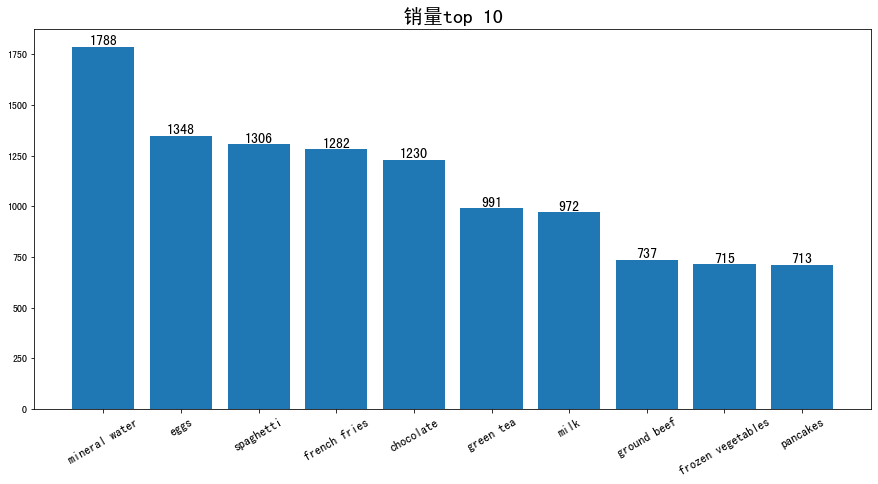

In [238]:

def show(x,y):
    plt.figure(figsize=[15,7])
    plt.bar(x,y)
    plt.title('销量top 10',fontsize=20)
    plt.xticks(x,x,size='large',rotation=30)
    for a,b in zip(x,y):
        plt.text(a,b+0.01,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=14)
    plt.show()
show(top10.index,top10.values)

# 词云展示 图片请看test.jpg

In [65]:
from wordcloud import WordCloud

In [113]:
text = ' '.join([key for i,v in df.iteritems() for key in v.values]) 
text

'shrimp burgers chutney turkey mineral water low fat yogurt whole wheat pasta soup frozen vegetables french fries eggs cookies turkey spaghetti mineral water mineral water shrimp turkey turkey meatballs red wine rice spaghetti burgers eggs parmesan cheese ground beef sparkling water mineral water frozen vegetables herb & pepper mineral water turkey frozen vegetables cookies pickles energy bar red wine mineral water pickles spaghetti fresh tuna spaghetti soup escalope soup mineral water mineral water avocado burgers spaghetti fresh tuna spaghetti spaghetti french fries tomato sauce turkey eggs soup turkey spaghetti clothes accessories energy drink soup turkey french fries chocolate herb & pepper cookies shrimp grated cheese burgers cookies yogurt cake soup cookies mineral water eggs grated cheese mint eggs burgers mineral water burgers energy bar energy bar chocolate low fat yogurt asparagus burgers low fat yogurt burgers champagne champagne burgers ham turkey muffins cookies frozen veg

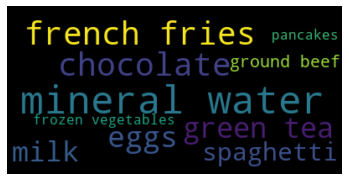

In [240]:
wc = WordCloud(max_words=10,collocations=True,min_word_length=2)
wc.generate(text).to_file('./test.jpg')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [94]:
df.values

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., '', '', ''],
       ['chutney', '', '', ..., '', '', ''],
       ...,
       ['chicken', '', '', ..., '', '', ''],
       ['escalope', 'green tea', '', ..., '', '', ''],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., '', '', '']],
      dtype=object)

# 用Counter 函数统计

In [120]:
from collections import Counter

In [127]:
df.values.reshape(1,-1)[0]

array(['shrimp', 'almonds', 'avocado', ..., '', '', ''], dtype=object)

In [135]:
value = df.values.reshape(1,-1)[0]
value[value!='']

array(['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
       'yogurt cake', 'low fat yogurt'], dtype=object)

In [138]:
c = Counter(value[value!=''])

In [141]:
top_10 = np.array(c.most_common(10)) 

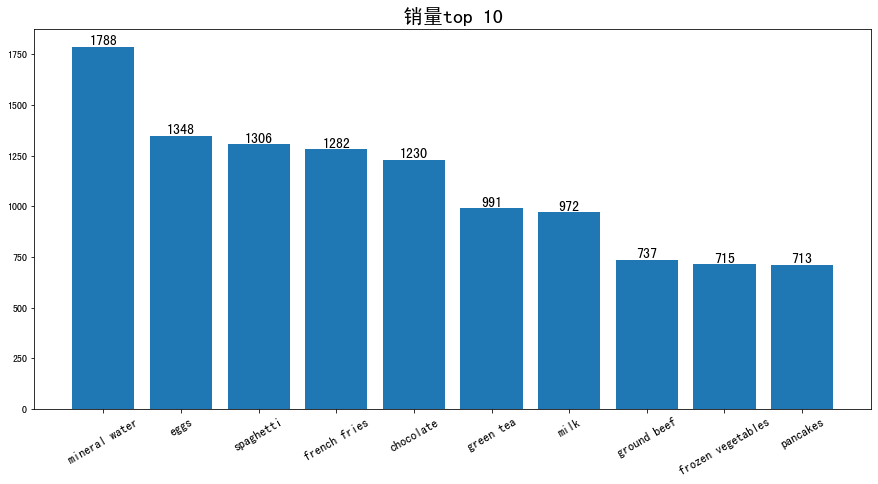

In [153]:
show([i for i,v in top_10_new],[v for i,v in top_10_new])